# Import and Clean Dataset

In [1]:
import csv
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

c:\Users\Owner\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
psych_csv = Path("psyco.csv")
df = pd.read_csv(psych_csv)

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [3]:
# Clean incorrectly coded age range
def age_modification(age_range):
    if 'Dec-18' in age_range:
        return "0-18"
    else:
        return age_range

df['age'] = df['age'].apply(age_modification)
    
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [4]:
# Change the binary columns into usable data

# Loop through the rows to recode the values
def recode_hw(value):
    # Specify conditions and recoding mappings
    conditions = [11, 101, 111, 1001, 1011, 1101, 1111]
    recoding_mappings = [10, 100, 110, 1000, 1010, 1100, 1110]

    if value in conditions:
        return recoding_mappings[conditions.index(value)]
    else:
        return value

# Apply to the binary columns
df['recoded_like_hw'] = df['like_hw'].apply(recode_hw)
df['recoded_dislike_hw'] = df['dislike_hw'].apply(recode_hw)

df


,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN,10,1
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN,100,110
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN,1110,110
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN,1110,1100


In [5]:
# Ensure the values were recoded correctly and both columns have the same values 
likehw_unique_values = np.sort(df['recoded_like_hw'].unique())
dislikehw_unique_values = np.sort(df['recoded_dislike_hw'].unique())

print(f'The values in the sorted_like_hw column are {likehw_unique_values}')
print(f'The values in the sorted_dislike_hw column are {dislikehw_unique_values}')

The values in the sorted_like_hw column are [   1   10  100  110 1000 1010 1100 1110]
The values in the sorted_dislike_hw column are [   1   10  100  110 1000 1010 1100 1110]


In [6]:
# As there are 8 unique values, convert values into a 8-point scale for easier interpretation
scale_mapping = {
    1: 1,
    10: 2,
    100: 3,
    110: 4,
    1000: 5,
    1010: 6,
    1100: 7,
    1110: 8
}

df['scaled_like_hw'] = df['recoded_like_hw'].map(scale_mapping)
df['scaled_dislike_hw'] = df['recoded_dislike_hw'].map(scale_mapping)

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000,6,5


In [7]:
# Drop binary columns, recoded columns, and custom data columns 
df = df.drop(columns=["like_hw", "dislike_hw", "recoded_like_hw", "recoded_dislike_hw", "Unnamed: 19", "time_bp.1", "travel+work"])
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,Complete Physical Attendance,Yes,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,Complete Physical Attendance,No,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,Complete Physical Attendance,Yes,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,Complete Physical Attendance,Yes,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,Complete Physical Attendance,Yes,6,5


## Describing the Data

In [8]:
# Determine sample size

num_rows = df.shape[0]
print(f'The sample size is n = {num_rows}')

The sample size is n = 1175


gender
Male                 649
Female               518
Prefer not to say      8
Name: count, dtype: int64


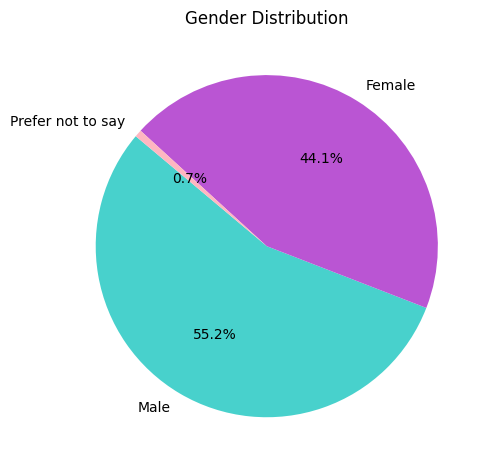

In [9]:
# Determine gender distribution of dataset with piechart

gender_counts = df['gender'].value_counts()
colors = ['mediumturquoise', 'mediumorchid', 'lightpink']

gender_image = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution')
plt.tight_layout()

# save figure to images folder
folder_path = 'images'  
filename = 'gender_distribution.png'
file_path = os.path.join(folder_path, filename)
plt.savefig(file_path, dpi=600)

print(gender_counts)
plt.show()

age
19-25    345
26-32    261
40-50    181
50-60    170
33-40    102
0-18      74
60+       42
Name: count, dtype: int64


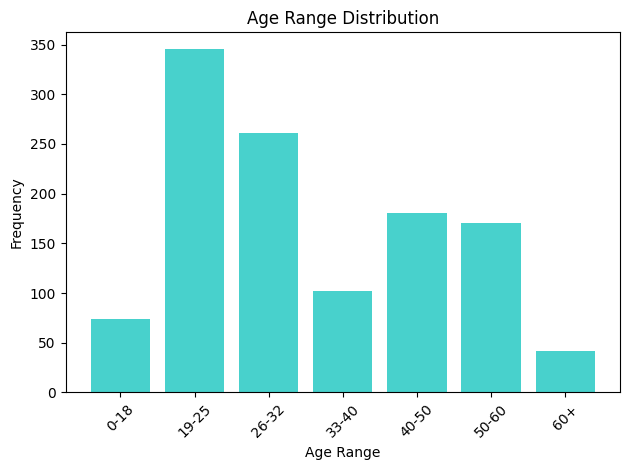

In [10]:
# Determine age distribution of dataset

age_counts = df['age'].value_counts()
age_counts_sorted = age_counts.sort_index()

plt.bar(age_counts_sorted.index, age_counts_sorted.values, color='mediumturquoise')
plt.title('Age Range Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Save figure to images folder
folder_path = 'images'  
filename = 'age_distribution.png'
file_path = os.path.join(folder_path, filename)
plt.savefig(file_path, dpi=600)

print(age_counts)
plt.show()

occupation
Working Professional                                    479
Student in College                                      358
Entrepreneur                                            119
Homemaker                                                82
Medical Professional aiding efforts against COVID-19     73
Currently Out of Work                                    44
Student in School                                        18
Retired/Senior Citizen                                    2
Name: count, dtype: int64


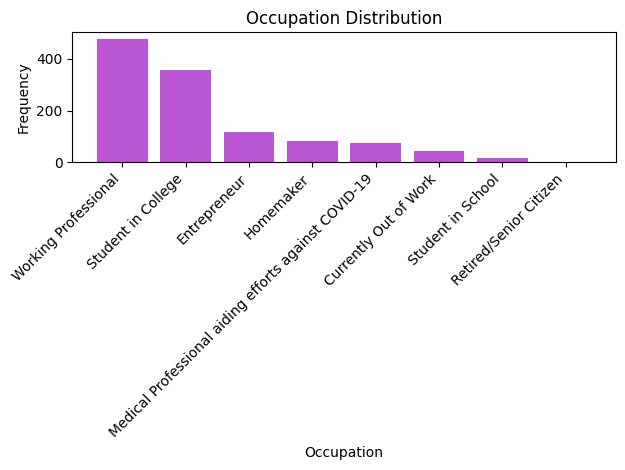

In [11]:
# Determine the occupation/education distribution of the dataset

occupation_counts = df['occupation'].value_counts()

plt.bar(occupation_counts.index, occupation_counts.values, color="mediumorchid")
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# save figure to images folder
folder_path = 'images'  
filename = 'occ_distribution.png'
file_path = os.path.join(folder_path, filename)
plt.savefig(file_path)

print(occupation_counts)
plt.show()

**Interpretation**:

Descriptive statistics were used to glean demographic information about the sample. The sample size of the dataset used is n = 1175, which is a fairly robust number for a psychology study. Gender distribution was nearly balanced, with males representing 55.2% of the total sample, 44.1% female, and 0.7% preferring not to answer. The age of the sample ranged from under 18 to 60+, with the majority of the sample between the ages of 19-25 (n = 345), followed by 26-32 (n = 241). The occupational distribution showed the majority of the sample being working professionals, (n = 479), followed by students in college (n = 358; an unsurprising finding considering the majority of psychology studies are conducted at universities/colleges).

## Does self-rated sleep cycle quality affect productivity increase?

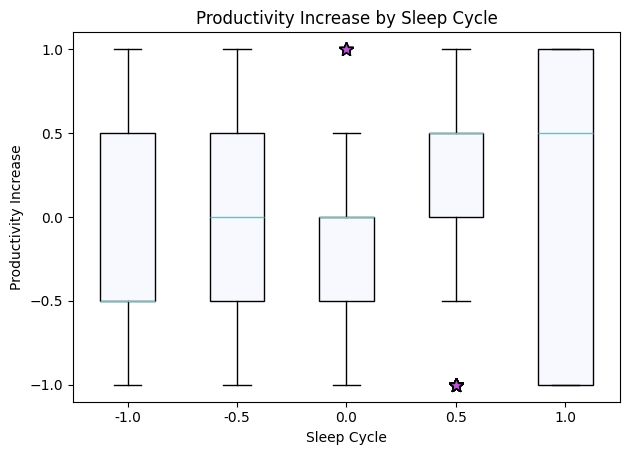

In [12]:
# Use boxplot to compare productivity increase distributions across self-reported sleep cycle scores

df.boxplot(by='sleep_bal', column=['prod_inc'],
            patch_artist=True,
            boxprops=dict(facecolor='ghostwhite'),
            whiskerprops=dict(color='k'),
            capprops=dict(color='k'),
            medianprops=dict(color='mediumturquoise'),
            flierprops=dict(markerfacecolor='mediumorchid', marker='*', markersize=10, linestyle='none'))
plt.title('Productivity Increase by Sleep Cycle')
plt.suptitle('') 
plt.xlabel('Sleep Cycle')
plt.ylabel('Productivity Increase')
plt.yticks([-1.0, -0.5, 0, 0.5, 1])
plt.grid(False)
plt.tight_layout()

# Save figure to images
folder_path = 'images'  
filename = 'prod_by_sleep.png'
file_path = os.path.join(folder_path, filename)
plt.savefig(file_path, dpi=600)

plt.show()

In [14]:
# Perform independent samples t-test to see if there is a significant difference between means in productivity for lowest and highest sleep quality groups
low_sleep_group = df[df['sleep_bal'] == -1]['prod_inc']
high_sleep_group = df[df['sleep_bal'] == 1]['prod_inc']

# Check to make sure groups are truly independent
if len(set(low_sleep_group.index).intersection(set(high_sleep_group.index))) > 0:
    print("Error: Overlapping observations found between the two groups")
else:
    # Perform independent samples t-test
    t_statistic, p_value = stats.ttest_ind(low_sleep_group, high_sleep_group)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

t-statistic: -3.153226753924604
p-value: 0.0017682981407245763


**Interpretation**: 

This research question aimed to explore the impact of sleep quality on productivity increases among participants, utilizing self-rated measures for both sleep cycle quality ("sleep_bal") and productivity increase ("prod_inc"). Each was assessed on a 5-point scale, ranging from -1 (indicating a poor sleep cycle/decrease in productivity) to +1 (indicating an excellent sleep cycle/increase in productivity) in the respective outcomes.

An initial look via box plot revealed the median of productivity increase scores tend to rise in tandem with sleep cycle quality scores. Interestingly, individuals rating their sleep quality as +1 exhibited the broadest distribution productivity outcomes, suggesting high variability within this group. 

To quantitatively assess the relationship between sleep cycle quality and productivity increase, an independent samples t-test was conducted, targeting the mean differences in productivity increase between participants with the lowest and highest sleep quality scores (-1 and +1, respectively). The analysis yielded a p-value of .001, significantly below the alpha threshold of .05, thereby indicating a statistically significant difference in productivity increase between these groups. The t-statistic of -3.1532 further clarifies that participants with higher sleep quality scores report significantly greater improvements in productivity compared to those with lower scores.

This finding underscores the critical role of sleep quality in enhancing productivity. However, given the demographic information of the sample, generalizability of this finding is limited.